# Introduction

This notebook is an introduction to transient absorption spectroscopy using KiMoPack <br>
In contrast to the other tutorials we are using artificial data for this analysis to <br>
enable the user to judge the success of the analysis. <br>
For this training we will be using a dataset was generated by creating a reaction of <br>
the type A->B->C and spectra as shown in these images. We will try to enable the user <br> 
to perform a similar analysis. The following tutorials 1-5 (or more if some were added <br>
since writing this) use then real data.

<img src="img/Intro_tutorial.png" style="width:500px;">

## The steps of an analysis

A typical analysis involves the following steps:

1. Data Import
2. Data Shaping
3. (Optional) comparative analysis
4. Modelling
5. Reporting

In KiMoPack the analysis is normally guided by the workflow tools that can be found here: 
https://github.com/erdzeichen/KiMoPack/tree/main/Workflow_tools
of directly downloaded by calling the function: 

``` python
    import KiMoPack
    KiMoPack.download_notebooks()
```
Alternatively the following function downloads the notebook and all the Tutorial Notebooks and training data:

``` python
    import KiMoPack
    KiMoPack.download_all()
```

## Python Imports
KiMoPack is a python package that heavily relies on the python data analysis infrastructure.<br>
Each notebook starts with series of imports. Here we add an option that recognizes if this notebook<br>
is run on Colab. In this case we download the necessary datafiles.<br> 

**Note** Limitations on Colab are the interactive functions. So Chirp correction and clicking into the figures does not work (yet)<br>

The whole program is contained in the single file **plot_func** that typically is imported as **pf** 

In [1]:
import os,sys
#---This section is importing KiMoPack and tries to catch when it is not installed, in which case it installs it from pypi
try:
    import KiMoPack.plot_func as pf
except Exception as e:
    print(e)
    print('We now try to install KiMoPack')
    !pip install kimopack
    !pip install python-pptx
    try: #Now that we have installed, lets try to import again
        import KiMoPack.plot_func as pf
    except: #seems like we need to restart the server
        print("\n\n#-------\n We forced a restart \n Please run this cell again!\n\n ")
        os._exit(00)  #dirty trick to kill the server and force a restart  

#--- This section is importing additional modules needed in this tutorial
import pandas as pd
import numpy as np
import matplotlib,lmfit
import matplotlib.pyplot as plt

#-----this section is downloading the files and sets the paths to the data.
if "google.colab" in sys.modules:    #Check we are local or on Colab
    pf.download_all('Introduction') # download the datafiles
    use_inline=True
    path_to_files = os.sep.join([os.getcwd(), "Tutorial_Notebooks","Data", "Introduction"])
    sys.path.append(os.path.join('KiMoPack','Tutorial_Notebooks'))# add the path to the function file
    pf.halfsize=True
    pf.changefonts()
else:
    path_to_files = os.sep.join([os.getcwd(), "Data", "Introduction"])
    use_inline=True
if use_inline:
    %matplotlib inline
    pf.halfsize=True
    pf.changefonts()
else:
    #%matplotlib qt
    %matplotlib tk

Plot_func version 7.11.8
was imported from path:
 C:\Users\jensu\anaconda3\Lib\site-packages\KiMoPack
The current working folder is:
 c:\Users\jensu\Dropbox\coding\github\KiMoPack\Tutorial_Notebooks


# Data Import

In KiMoPack data is imported and handled in form of a Pandas DataFrame. <br>
The data is either read from disc by one of the import functions or given <br>
to the function in form of a dataframe that is commonly called "ds" for Dataset.<br> 
The manual import is used as a backup or as a way to start fitting with intermediary results. <br>
Please see the end of this tutorial in the section "Fitting of oscillations" for an example. 

In this tutorial we will focus on the main import function **pf.TA** that is used<br>
to create a single transient absorption object. For work with many single scans please <br> 
see Tutorial 4 "Single scan handling", for comparative work please see tutorial 3 "Compare Fit".

All import function have a wide variety of options to adapt to different file types and shapes.<br>
Most file types and shapes can be imported naturally. There is also the option to provide a **conversion_function**.<br>
This function is an API that makes importing files of different shapes more comfortable and can e.g. <br>
adjust names and formats very flexibly. Please see the documentation of the function with "pf.TA?" or the online documentation under:
    https://kimopack.readthedocs.io/en/latest/Opening.html
for more details. 

## Finding the Filename and path
There are two general ways to provide the name and path to the files that are to be investigated. 
    
1. Either the filename and path to the file is provided. In this case the path is <br>
        either a single word (e.g. "Data" if all the data is in the relative folder <br>
        "data" or a path to files. All the usual ways to handle a path should work. <br>
        I prefer to create a path by creating a platform independent string 
2. instead of a filename the word **gui** is used, in which case a TKinter Gui opens <br> 
    and allows the user to select a file (and path) I recommend that directly after <br>
    the file is opened the use changes the work **gui** into **recent**. Because then the <br> 
    code will reopen last file that was opened before with the gui (permitting restarting)

In this example we will use the filename.

In [2]:
ta=pf.TA("con_1.SIA",path=path_to_files)

If no errors appear the import was most likely successful and we can continue with the inspection and shaping of data. <br> 
If there are troubles during or the data does not look like it should, the imported data is stored in the DataFrame **ta.ds_ori**  <br> 
and checking if this looks correct with "ta.ds_ori.head()" is a very good first step for finding the right input parameters.<br>

**Note**: there are on some systems deprecation warnings appearing. Those can be safely ignored. The concept of KiMoPack is not to lock the version of the modules used, meaning that I constantly update the code to new (and changing functions). This is done to enable the users to use KiMoPack in many different scenarios and with many packages.


## Data Inspection, shaping and RAW plotting
The first step is usually to visually inspect the data. <br> 
In KiMoPack we use three plotting functions for all plotting tasks and three functions for comparative plotting (see Tutorial 3)
``` python
ta.Plot_RAW()
ta.Plot_fit_output()
ta.Plot_Interactive()
```
All plot functions plot in their standard call (as above) multiple plots simultaneously. <br> 
The first argument is a list that calls all the plots that one chooses. For RAW plotting the default is:
``` python
ta.Plot_RAW(range(4))
```

Here we choose to only look at the Matrix, which is plot "0" (see the documentation with "ta.Plot_RAW?" or https://kimopack.readthedocs.io/en/latest/Plotting.html

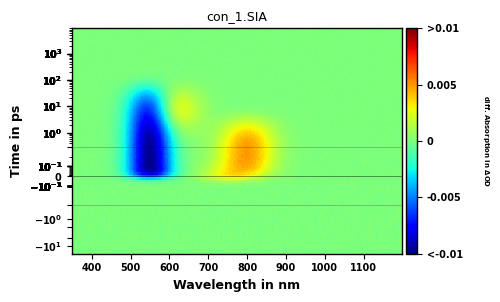

In [3]:
ta.Plot_RAW(0)

**Note** In this tutorial we use the "inline" plotting option. Meaning that all the plots will be in the notebook and not interactive. <br>
If you change during the import the variable: use_inline to "False" and restart the notebook, you will have the option to interact with most plots. <br> This not only includes the resizing of the figures, but also to activate the option to click in the figures and print the click position.
The options:
``` python
ta.intensity_range=1e-2
ta.intensity_range=[0,1e-2]
ta.log_scale=True
```
set the amplitude in the plot, first symmetric from -1e-2 to 1e-2, the second asymmetric and the last in a logarithmic scale. Plotting in a logarithmic scale is very useful for seeing small changes, but distorts the mayor scale. I usually use it to see the last changes during fitting.

Now lets set the range where we want to fit with the time_limits and spectral limits:

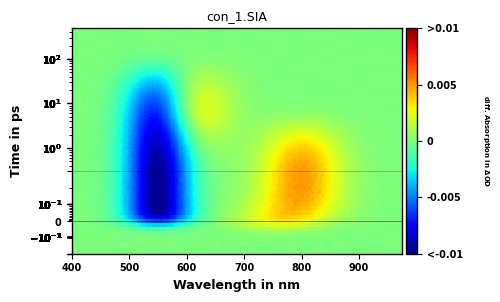

In [4]:
ta.bordercut=[400,975]
ta.timelimits=[-0.2,500]
ta.Plot_RAW(0)

And set the interesting wavelength and time points where we want the code to plot Kinetics and spectra respectively. e

In [5]:
ta.rel_time=[-0.1,-0.02,0.035,0.2,0.5,2,14,22,92,160]
ta.rel_wave=[430,487,525,640,720,820,900,950]

During the import these values are set automatically:
``` python
ta.rel_wave = np.arange(300,1000,100)
ta.rel_time = [0.2,0.3,0.5,1,3,10,30,100,300,1000,3000,9000]
```
The parameter "wavelength_bin" set the width of the spectral bins. The parameter "time_width_percent" sets a percentual binning for the times.
additional shaping options include rebinning in the spectral range "wave_nm_bin" or in energy scale "equal_energy_bin". See:<br>
https://kimopack.readthedocs.io/en/latest/Plotting.html#plot-shaping-options-without-influence-on-the-fitting and<br>
https://kimopack.readthedocs.io/en/latest/Shaping.html for more details

Lets plot all of the RAW spectra: 

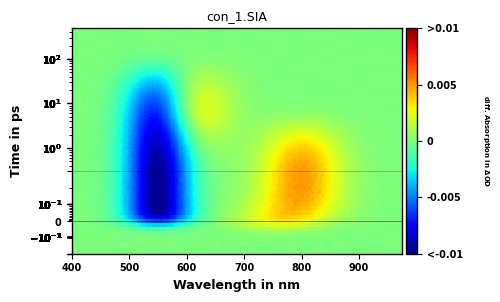

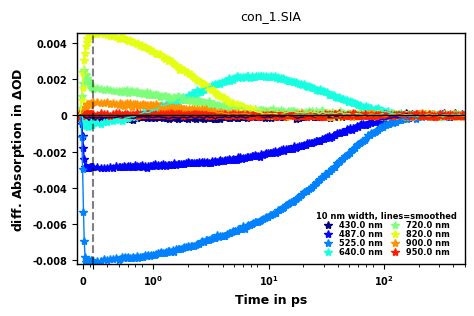

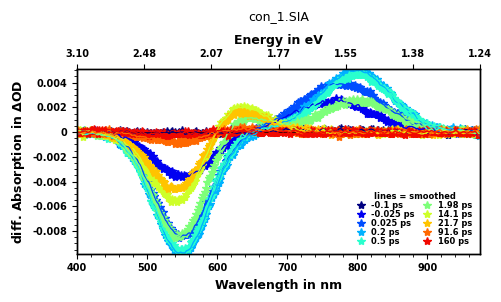

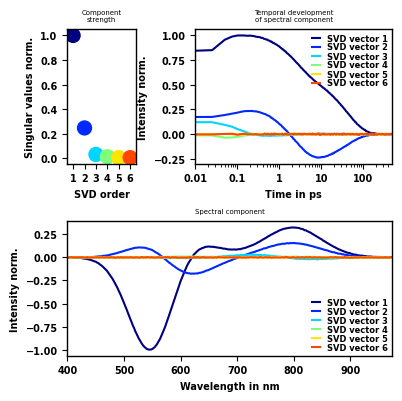

In [6]:
ta.Plot_RAW()

**Note** The filename is the standard title of the plots. The Plot function can take other titles. Alternatively changing the variable "ta.filename" can be used to change the title permanently.

``` python
ta.Save_Powerpoint(save_Fit=False,title='Tutorial plot')
```
This would create these plots and place them all on a powerpoint slide and save this slide.

# Fitting of Data
One of the main purposes of KiMoPack is to make a Global analysis of the data. As can be seen from the results of the SVD (last plot in the RAW plotting) the independent extraction of the spectra using the usual approach $ U\,\times\,\sum\,\times\,V^{T} = M$ leads to vectors that are extracted from the data only and not physically meaningfull. <br> 
1. KiMoPack is using a parametric model function **ta.mod** to prepare a "concentration matrix" $C(t)$.
2. In the standard usage the spectral matrix (called "DAC" in KiMoPack) is then calculated with np.linalg.lstsq so that the calculated matrix **AC** is $C(t)\,\times\,DAC(\lambda)=AC$.
3. Then an error matrix **AE** is calculated that is the difference between the (shaped) measured matrix **A** and the calculated matrix **AC**
4. Then the parameter of the **ta.mod** are modulated to minimize the sum of the squared **AE**

This fitting process has a huge amount of options that include the providing of external spectra. If a sufficient amount of external spectra are provided this fitting process changes into a linear combination analysis. named switches like "ext_spectra_scale", "extt_spectra_shift"or 		"ext_spectra_guidechange how they are handled. <br>
e But let's start at the beginning:

## choosing of the model function
KiMoPack can either use one of the 3 **named functions**:
``` python
ta.mod = 'exponential' #or 'paral'
ta.mod = 'consecutive'
ta.mod = 'full_consecutive'
```
or an externally provided **external fitting function** as are provided in the file "function_library.py" and summarized in "Function_library_overview.pdf". The provided external fitting functions include linear and non linear models that cover pretty much any of the possible models with 3 or 4 species including some vibrational models<br>
. Most function know switches like "background" = fit the background, "infinite" = non decaying species, "explicit_gs" = make the bleach an explicit speci. <br> But in general the external function can be pretty much anything that is needed. It gets a time vector, (at which point the function should return an entrance) and a pardf = Dataframe with the parameter from the fitting point. **It is expected to return the C(t)** and anything else is free. <br> We will look into these functions a bit later in this tutorial. Important to mention is that there is no difference in how this is handled.

In this tutorial we start with a **Decay analysis**""

In [7]:
ta.mod='exponential'       # Choose a model here 'exponential' to get simple exponential decays

Next we create a parameter object and choose appropiate guess values.<br>
I use the limiting options "min" and "max" and typically freeze with **vary=False**: <br>
the starting time "t0" and <br>
the instrument response time 'resolution'<br>
Usually the RAW plot of the kinetics is a good starting point to read the initial guesses (as are previous informations)

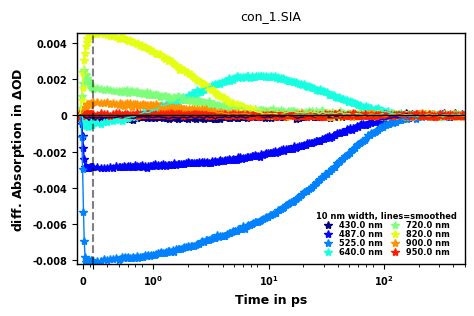

In [8]:
ta.Plot_RAW(1)
ta.par=lmfit.Parameters()                                       # create empty parameter object
ta.par.add('k0',value=1/0.14,vary=True)                  
ta.par.add('k1',value=1/2.35,vary=True)             
ta.par.add('k2',value=1/40,vary=True)   
###-------Adding instrument parameter, here frozen---------------
ta.par.add('t0',value=0,min=-2,max=2,vary=False)                       # Allow the arrival time to adjust? (False here)
ta.par.add('resolution',value=0.086,min=0.04,max=0.5,vary=False)       # Allow the instrument response to adjust (False here)

now we could with 
```python
ta.Fit_Global()
```
trigger a fit <br>
However i usually use this loop to freeze all parameter and check how good my input parameter actually are.<br>
the last function  
``` python
ta.Plot_fit_output()
```
is plotting the fit output. Like the plotting function "ta.Plot_RAW" the default is: "ta.Plot_fit_output(range(7))" but here we use for simplicity just the matrix plot

Optimizing, after the starting error the new error values will be displayed every 30s
ATTENTION: we have not optimized anything but just returned the parameters

Fit Results:
Model Used: exponential

The minimum error is:9.15357981e-03
The minimum R2-value is:9.73494376e-01

In Rates

+------------+----------+--------------+--------+-------+-------+--------+
|            |    value |   init_value | vary   |   min |   max | expr   |
+============+==========+==============+========+=======+=======+========+
| k0         | 7.14286  |     7.14286  | False  |  0    | inf   |        |
+------------+----------+--------------+--------+-------+-------+--------+
| k1         | 0.425532 |     0.425532 | False  |  0    | inf   |        |
+------------+----------+--------------+--------+-------+-------+--------+
| k2         | 0.025    |     0.025    | False  |  0    | inf   |        |
+------------+----------+--------------+--------+-------+-------+--------+
| t0         | 0        |     0        

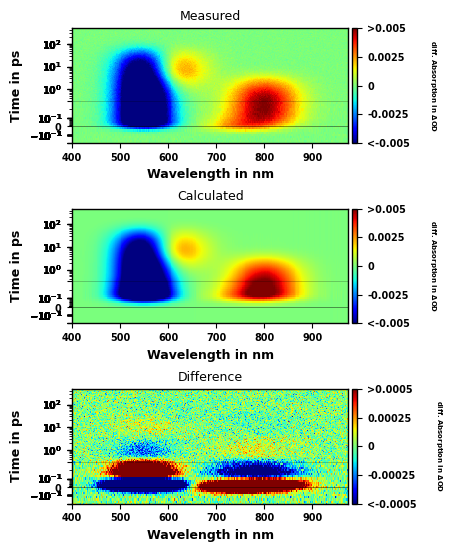

In [9]:
for key in ta.par.keys():
    ta.par[key].vary=False
ta.Fit_Global()                                 # trigger fitting
ta.Plot_fit_output(4)

Not bad for pure guesses. <br>
I usually leave the full fitting cell together and use "if 0:" to turn of the starting value checking.<br>
lets run an actual fit followed by a full out put of ta.Plot_fit_output()

Optimizing, after the starting error the new error values will be displayed every 30s

Fit Results:
Model Used: exponential

The minimum error is:1.24774594e-03
The minimum R2-value is:9.96386956e-01

In Rates

+------------+------------+--------------+--------+-------+-------+--------+
|            |      value |   init_value | vary   |   min |   max | expr   |
+============+============+==============+========+=======+=======+========+
| k0         | 40.244     |     7.14286  | True   |  0    | inf   |        |
+------------+------------+--------------+--------+-------+-------+--------+
| k1         |  0.40628   |     0.425532 | True   |  0    | inf   |        |
+------------+------------+--------------+--------+-------+-------+--------+
| k2         |  0.0247817 |     0.025    | True   |  0    | inf   |        |
+------------+------------+--------------+--------+-------+-------+--------+
| t0         |  0         |     0        | False  | -2    |   2   |        |
+------------+-----

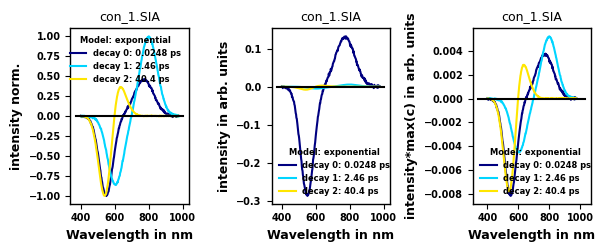

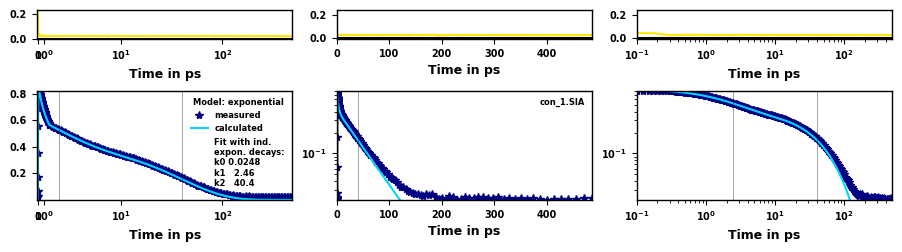

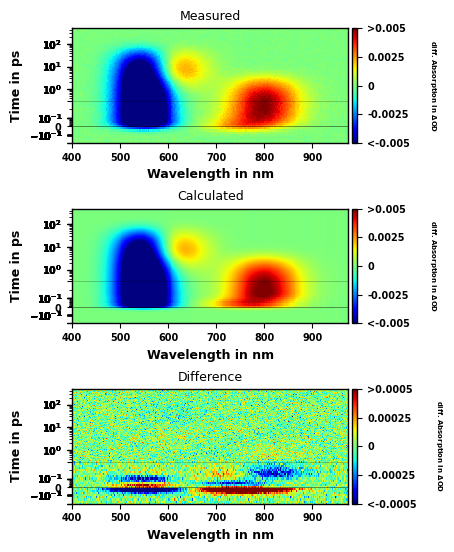

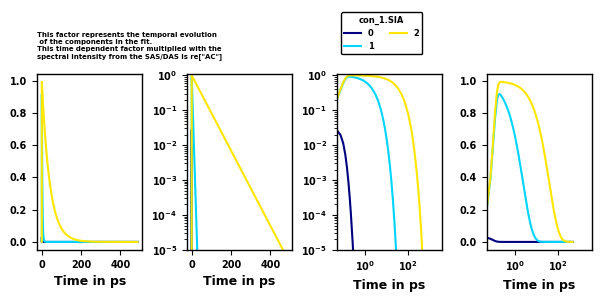

In [10]:
ta.mod='exponential'       # Choose a model here 'exponential' to get simple exponential decays
par=lmfit.Parameters()                                       # create empty parameter object
par.add('k0',value=1/0.14,vary=True)                  
par.add('k1',value=1/2.35,vary=True)             
par.add('k2',value=1/40,vary=True)   
###-------Adding instrument parameter, here frozen---------------
par.add('t0',value=0,min=-2,max=2,vary=False)                       # Allow the arrival time to adjust? (False here)
par.add('resolution',value=0.086,min=0.04,max=0.5,vary=False)       # Allow the instrument response to adjust (False here)
if 0:
    for key in par.keys():
        par[key].vary=False
ta.par=par                                                     # write parameter object into file for fitting
ta.Fit_Global()                                 # trigger fitting

plt.close('all')
ta.Plot_fit_output([0,1,4,5])                            # plot the fit output

The output is stored in **ta.re** (a dictionay) with 
* **"c"** = $c(t)$
* **"DAC"** = $DAC(\lambda)$
* **"A"**, **"AC"**, **"AE"**
* a large number of other things
   
The plots I usually check are:

    1 Decay associated spectra (called **DAC**)
        a. middle: as calculated
        b. right: spectra multiplied by maximum of c(t) for check if it should be visible
        c. left: normalized
    2. The spectral axis summed
    5. The fitted Matrixes
    6. The c(t) that was actually used
Together with the metrix $R^2$ and $\chi^2$<br>
Other plotting options include the residuals(6), kinetics(2), spectra(3)

## Target Analysis
The next model one typically tries is a consecutive model (A->B->C) This only requires to change the model name

In [ ]:
ta.mod='consecutive'
ta.Fit_Global()
ta.Plot_fit_output([0,1,4,5])

Here it is still visible that the "species" have a bleach and a stimulated emission.<br> 
Next I would try to add the ground state explicitely by adding the keyword **explicit_GS**<br>
I usually keep the fitting cell together as one unit and work on the parameters.<br>

**compare the last plot containing the c(t) to understand the difference** 

In [ ]:
ta.mod='consecutive'       # Choose a model here 'exponential' to get simple exponential decays
par=lmfit.Parameters()                                       # create empty parameter object
par.add('k0',value=1/0.14,vary=True)                  
par.add('k1',value=1/2.35,vary=True)             
par.add('k2',value=1/40,vary=True)   
###-------Adding instrument parameter, here frozen---------------
par.add('t0',value=0,min=-2,max=2,vary=False)                       # Allow the arrival time to adjust? (False here)
par.add('resolution',value=0.086,min=0.04,max=0.5,vary=False)       # Allow the instrument response to adjust (False here)
if 0:
    for key in par.keys():
        par[key].vary=False
ta.par=par                                                     # write parameter object into file for fitting
ta.Fit_Global()                                 # trigger fitting

plt.close('all')
ta.Plot_fit_output([0,1,4,5])                            # plot the fit output

the longer timepoints are very well represented, but there are still some errors in the early times. So we permit the laser arrival time, and the instrument response function free again and change the model to "full_consecutive".

The difference is that instead of using a rise for the first species and then a consecutive approach, we are now modelling the decay by sampling the excitation with a "pulse"

In [ ]:
ta.mod='full_consecutive'    
par=lmfit.Parameters()                                       # create empty parameter object
par.add('k0',value=1/0.101,vary=True)                  
par.add('k1',value=1/2.4,vary=True)             
par.add('k2',value=1/39,vary=True)   
par.add('t0',value=0,min=-2,max=2,vary=False)                       # Allow the arrival time to adjust? (False here)
par.add('resolution',value=0.086081,min=0.04,max=0.5,vary=False)       # Allow the instrument response to adjust (False here)
par.add('explicit_GS')

ta.par=par                                                     # write parameter object into file for fitting
ta.Fit_Global()                                 # trigger fitting
ta.Plot_fit_output([0,1,4,5])


There is only a small bleach left in the species associated spectra which is excellent.<br>
Many optimizations are now possible, <br>
one would be to give each of the fitted parameters a limit and using the global optimizer "AMPGO" does solve this problem. However, while Ampgo is one of the most efficient global codes, it is still slow enough for a coffee<br> 
another highly recommended approach would be to provide additional information such as external spectra. Here we could make a guess for a gaussian.


In [ ]:
def gauss(t,sigma=35,mu=545,amp=0.85):
	'''Gauss function'''
	y=np.exp(-0.5*((t-mu)**2)/sigma**2)
	y/=sigma*np.sqrt(2*np.pi)
	return y*amp

wave=ta.re['A'].columns.values
df=pd.DataFrame(gauss(t=wave),index=wave)
df.columns=['GS']
df.sort_index(inplace=True)
df.plot()

and add it as the ground state spectrum to the modelling.<br>
Here we use the switch **par.add('ext_spectra_guide')** That converts the spectrum from "must be like this" to "should be some close to this"

In [ ]:
ta.mod='full_consecutive'    
par=lmfit.Parameters()                                       # create empty parameter object
par.add('k0',value=1/0.1,vary=True)                  
par.add('k1',value=1/2.5,vary=True)             
par.add('k2',value=1/40,vary=True)   
par.add('t0',value=0,min=-2,max=2,vary=True)                       # Allow the arrival time to adjust? (False here)
par.add('resolution',value=0.086081,min=0.04,max=0.5,vary=True)       # Allow the instrument response to adjust (False here)
par.add('explicit_GS')

#par.add('ext_spectra_scale',value=1,vary=True)
#par.add('ext_spectra_shift',value=0,vary=False)
par.add('ext_spectra_guide')
ta.par=par
ta.Fit_Global(ext_spectra=df)
#ta.Plot_fit_output([0])
ta.Plot_fit_output([0,5])

Now we can compare the time evolution of the components with the species associated spectra that were put into the data.
<img src="img/Intro_tutorial.png" style="width:500px;">
It is close, but still not perfect, and this is how it is in reality often. However adding the external spectrum made the data again a little bit better and with further modelling the representation gets even better.

For the next step it is a good idea to transfer the optimum parameter (stored in ta.par_fit) to the starting parameter

In [ ]:
ta.par=ta.par_fit

## Error Analysis.

It is a very imporant step to check the confidence interval, that unfortunately does take quite some time. (typically 100x the time for  a single optimization. It is generally a good idea to save the project before you do that with ta.Save_project() to not loose the prior work. The following cell shows the result of this run. The file "con_1_solved.hdf5" contains the project with the result for you to inspect.

In [ ]:
#ta.Fit_Global(confidence_level=0.95)
#Saved 20min
ta=pf.TA('con_1_solved.hdf5',path=path_to_files)
ta.filename='Solved_file.hdf5'
ta.Print_Results()

# Report the results
We can again create a Powerpoint to summarize the output.

In [ ]:
# save the results
plt.close('all')
ta.Save_Powerpoint(title='Tutorial plot after Fit')

# Typical data corrections (chirp,....)

In real data, the measured signals are not as nice and clear as we have worked with up to now.<br>
For 'con_2.SIA','con_3.SIA','con_4.SIA','con_5.SIA' 'con_6.SIA' typical disturbances were introduced. <br>
for which additional complications such as noise, chirp and crossphase modulation was added.<br>

1. Use the function "Cor_chirp" that is part of the ta object to correct the chrip in "con_2.SIA".
2.  Apply the same chirp correction (either via the file name or the ta.fitcoeff to the following files. You do want to use ta.intensity range and ta.log_plot=True/False to make the development in this file visible
1. In file con_3.SIA you additionally need to adress the spectral limits using "bordercut"
1. In file con_4.SIA we have typical artifacts and Cross-Phase-Modulation. Use "ignore_time_region" to blind this out 
1. in File con_5.SIA we have to additionally reject a spectral region in which the pump laser light scattered into the detector, as is often the case if measuring e.g. nano particles.
1. In the final file con_6.SIA our initial state has some Frank condon type oscillations. Fit the data with the kinetics, and find the oscillations in the Plot_Fit_output.

In [ ]:
ta1=pf.TA('con_2.SIA',path=path_to_files)
ta1.intensity_range=0.005
ta1.log_scale=True
ta1.Plot_RAW(0)

In [ ]:
ta1=pf.TA('con_2.SIA',path=path_to_files)
ta1.intensity_range=0.005
ta1.log_scale=True
ta1.timelimits=[-0.2,500]
ta1.rel_wave=[430,487,525,640,720,820,900,950]
ta1.rel_time=[-0.1,-0.02,0.035,0.2,0.5,2,14,22,92,160]

ta1.Plot_RAW(0,title='before_chirp')
ta1.Cor_Chirp()
ta1.Plot_RAW(0,title='after_chirp')

In [ ]:
ta1=pf.TA('con_3.SIA',path=path_to_files)
ta1.Cor_Chirp(chirp_file='con_2_chirp.dat')

ta1.intensity_range=0.005
ta1.log_scale=True
ta1.timelimits=[-0.2,500]
ta1.rel_wave=[430,487,525,640,720,820,900,950]
ta1.rel_time=[-0.1,-0.02,0.035,0.2,0.5,2,14,22,92,160]

ta1.Plot_RAW(0,title='before bordercut')
ta1.bordercut=[390,1150]
ta1.Plot_RAW(0,title='after bordercut')

In [ ]:
ta1=pf.TA('con_4.SIA',path=path_to_files)
chirp=[-1.29781491e-11,4.72546618e-08,-6.36421133e-05,3.77396295e-02,-8.08783621e+00]
ta1.Cor_Chirp(fitcoeff=chirp)
ta1.intensity_range=0.005
ta1.log_scale=True
ta1.timelimits=[-0.2,500]
ta1.bordercut=[390,1150]
ta1.rel_wave=[430,487,525,640,720,820,900,950]
ta1.rel_time=[-0.1,-0.02,0.035,0.2,0.5,2,14,22,92,160]

ta1.Plot_RAW(0,title='with artifact')
ta1.ignore_time_region=[-0.15,0.1]
ta1.Plot_RAW(0,title='without artifact')

**Note** instead of a single region multiple regions can be defined
``` python
ta1.ignore_time_region=[[-0.15,0.1],[10,12]]
```

In [ ]:
ta1=pf.TA('con_5.SIA',path=path_to_files)
chirp=[-1.29781491e-11,4.72546618e-08,-6.36421133e-05,3.77396295e-02,-8.08783621e+00]
ta1.Cor_Chirp(fitcoeff=chirp)

ta1.intensity_range=0.005
ta1.log_scale=True
ta1.timelimits=[-0.2,500]
ta1.bordercut=[390,1150]
ta1.rel_wave=[430,487,525,640,720,820,900,950]
ta1.rel_time=[-0.1,-0.02,0.035,0.2,0.5,2,14,22,92,160]
ta1.ignore_time_region=[-0.15,0.1]

ta1.Plot_RAW(0,title='with laser scatter')
ta1.scattercut=[525,580]
ta1.Plot_RAW(0,title='without laser scatter')

**Note** instead of a single region multiple regions can be defined
``` python
ta1.scattercut=[[525,580],[780,820]]
```

# Advanced modelling, Let's look on some oscillations

In [ ]:
ta1=pf.TA('con_6.SIA',path=path_to_files)
chirp=[-1.29781491e-11,4.72546618e-08,-6.36421133e-05,3.77396295e-02,-8.08783621e+00]
ta1.Cor_Chirp(fitcoeff=chirp)

ta1.intensity_range=0.005
ta1.log_scale=False
ta1.timelimits=[-0.2,500]
ta1.bordercut=[390,1150]
ta1.scattercut=[525,580]
ta1.rel_wave=[430,487,525,640,720,820,900,950]
ta1.rel_time=[-0.1,-0.02,0.035,0.2,0.5,2,14,22,92,160]
ta1.ignore_time_region=[-0.15,0.1]
ta1.Plot_RAW(0)

In [ ]:
ta1.mod='full_consecutive'    
par=lmfit.Parameters()                                       # create empty parameter object
par.add('k0',value=1/0.100143,vary=True)                  
par.add('k1',value=1/2.496702,vary=True)             
par.add('k2',value=1/39.963222,vary=True)   
par.add('t0',value=0,min=-2,max=2,vary=False)                       # Allow the arrival time to adjust? (False here)
par.add('resolution',value=0.086081,min=0.04,max=0.5,vary=False)
par.add('explicit_GS')
ta1.par=par
 
ta1.Fit_Global()
ta1.Plot_fit_output([0,4])

Now we have the main Kinetics and can subtract them. Here simply use the residuals as the next matrix to be fitted and adjust the shaping parameters

In [ ]:
ta2=ta1.Copy()
ta2.ds=ta1.re['AE']

ta2.intensity_range=3e-4
ta2.rel_wave=[620,700,740,800,830,860]
ta2.timelimits=[0.1,10]
ta2.Plot_RAW(0,scale_type='linear')

As an alternative one could have subtracted all (or some) of the contributions using this approach:
``` python
    dicten=pf.Species_Spectra(ta1) # Extract each of the species as a matrix
    ta3=ta1.Copy()                 # Make a copy of the project to test
    ta3.ds=ta1.re['A']-dicten[1]-dicten[2]-dicten['GS'] #subtract one or multiple of the species.
```

Now we load the function file and select a model from it. <br>
Optimizing follows the same procedure

In [ ]:
import function_library as func
ta2.mod=func.oscil_comp   

In [ ]:
par=lmfit.Parameters()                                       # create empty parameter object
par.add('f0',value=1.00561,vary=True)                  
par.add('tk0',value=1/2.8725,vary=True,min=1/4,max=4)
par.add('S0',value=0.975956,vary=True ,min=0,max=1)
ta2.par=par
ta2.ignore_time_region=[-0.15,0.25]
#ta2.Fit_Global(other_optimizers='least_squares')
ta2.Fit_Global()

plt.close('all')
ta2.error_matrix_amplification=1
ta2.Plot_fit_output([0,4],scale_type='linear')

As does calculating the errors

In [ ]:
#This takes about 2min
#ta2.Fit_Global(confidence_level=0.95)

ta2=pf.TA('Fitted_Oscillations_with_confidence.hdf5',path=path_to_files)
ta2.Print_Results()

Finally  we combine the normal model and the oscillation model and make a combined fit.

In [ ]:
reload(func)
ta1.mod=func.manconsec_oscil
ta1.par=ta1.par_fit
for key in ['f0','tk0','S0']:
    ta1.par.add(key,value=ta2.par_fit[key].value)
    ta1.par[key].vary=False
ta1.par['S0'].min=0
ta1.par['S0'].max=1
ta1.Fit_Global()
ta1.Plot_fit_output()